# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls

In [3]:
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create variables
times = 0
response = []
city_name = []
max_temp = []
humidity = []
cloudliness = []
wind_speed = []
city_data = []
whole_dataset = []

# Loop through a list of cities and do a weather check
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        
        # Find city, country, lat, long, temperature, humidity, cloudiness, and wind speed
        city_name =(response['name'])
        max_temp = (response['main']['temp_max'])
        humidity = (response['main']['humidity'])
        cloudiness = (response['clouds']['all'])
        wind_speed = (response['wind']['speed'])
        lat = (response['coord']['lat'])
        long = (response['coord']['lon'])
        country = (response['sys']['country'])

        
        # Add data with labels to list and append
        city_data = ({
            "City" :city_name,
            "Country" :country,
            "Latitude" :lat,
            "Longitude" :long,
            "Max Temperature" :max_temp,
            "Humidity" :humidity,
            "Cloudiness" :cloudiness,
            "Wind Speed" :wind_speed,
        })
        whole_dataset.append(city_data)
        
    # Skip the city if not found
    except:
        print(f"City not found. Skipping...")
    
    times = times + 1      
    print(f"Processing record {times} | {city_name}")

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing record 1 | Sri Aman
Processing record 2 | Kabalo
Processing record 3 | Cape Town
Processing record 4 | Rikitea
Processing record 5 | Berlevåg
Processing record 6 | Norman Wells
Processing record 7 | Asău
Processing record 8 | Spirit River
Processing record 9 | Tilichiki
Processing record 10 | Narsaq
Processing record 11 | Albany
Processing record 12 | Atuona
City not found. Skipping...
Processing record 13 | Atuona
Processing record 14 | Ţahţā
Processing record 15 | Hong Kong
Processing record 16 | Fayaoué
Processing record 17 | Moose Factory
Processing record 18 | Kapaa
Processing record 19 | Dikson
Processing record 20 | Vanimo
City not found. Skipping...
Processing record 21 | Vanimo
Processing record 22 | Mataura
Processing record 23 | Lompoc
Processing record 24 | Ribeira Grande
Processing record 25 | Jamestown
Processing record 26 | Libreville
Processing record 27 | Longyearbyen
Processing record 28 | Hobart
P

Processing record 232 | Santa Cruz de la Sierra
Processing record 233 | Glyadyanskoye
Processing record 234 | Songea
Processing record 235 | Darhan
Processing record 236 | High Rock
Processing record 237 | Hithadhoo
Processing record 238 | Inírida
Processing record 239 | Iskateley
Processing record 240 | Jiexiu
Processing record 241 | Altay
Processing record 242 | Alice Springs
Processing record 243 | Santa Engracia
Processing record 244 | Ulaangom
Processing record 245 | East London
Processing record 246 | Bandarbeyla
Processing record 247 | Gilgit
Processing record 248 | Geraldton
Processing record 249 | Ushtobe
Processing record 250 | Guerrero Negro
Processing record 251 | Flinders
Processing record 252 | Zhongshu
Processing record 253 | Touros
Processing record 254 | Zorritos
City not found. Skipping...
Processing record 255 | Zorritos
Processing record 256 | Roebourne
Processing record 257 | Thompson
Processing record 258 | Kalabo
Processing record 259 | Gamba
Processing record 26

Processing record 464 | Caucayá
Processing record 465 | Pedersore
City not found. Skipping...
Processing record 466 | Pedersore
Processing record 467 | Puri
Processing record 468 | Elizabeth City
Processing record 469 | Kamloops
Processing record 470 | Aloleng
Processing record 471 | Urengoy
Processing record 472 | Alcúdia
Processing record 473 | Arkhangelsk
Processing record 474 | Celano
City not found. Skipping...
Processing record 475 | Celano
City not found. Skipping...
Processing record 476 | Celano
Processing record 477 | Hope
Processing record 478 | Prince Rupert
Processing record 479 | Atocha
Processing record 480 | Sorong
Processing record 481 | Les Cayes
Processing record 482 | Kavieng
City not found. Skipping...
Processing record 483 | Kavieng
Processing record 484 | Igboho
Processing record 485 | Egvekinot
Processing record 486 | Pontianak
Processing record 487 | Ketchikan
City not found. Skipping...
Processing record 488 | Ketchikan
Processing record 489 | Chase
Processing

### Convert Raw Data to DataFrame

In [4]:
# Create city data dataframe
city_data_df = pd.DataFrame(whole_dataset)
city_data_df

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Sri Aman,MY,1.2376,111.4621,77.09,94,98,2.30
1,Kabalo,CD,-6.0500,26.9167,77.67,32,16,3.96
2,Cape Town,ZA,-33.9258,18.4232,57.11,88,75,12.66
3,Rikitea,PF,-23.1203,-134.9692,74.07,79,99,15.64
4,Berlevåg,NO,70.8578,29.0864,51.60,81,20,11.50
...,...,...,...,...,...,...,...,...
557,Zhezkazgan,KZ,47.8043,67.7144,63.30,62,22,9.17
558,Presidencia Roque Sáenz Peña,AR,-26.7852,-60.4388,52.16,72,70,7.52
559,Salinópolis,BR,-0.6136,-47.3561,79.36,82,3,11.52
560,Tegul'det,RU,57.3064,88.1667,54.50,95,49,3.67


In [5]:
# Export dataframe to CSV file
city_data_df.to_csv("city_data.csv")

### Plotting the data

#### Latitude vs. Temperature Plot

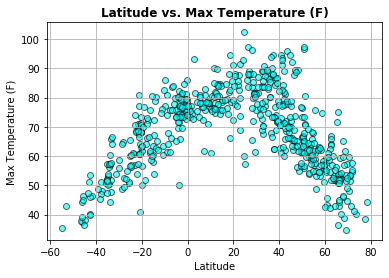

In [6]:
# Build scatter plot with data
plt_temp = city_data_df['Max Temperature']
plt_lat = city_data_df['Latitude']

plt.scatter(plt_lat, plt_temp, facecolor = "cyan", edgecolor="black", linewidths=1, marker="o", alpha=0.6)

# Add labels
plt.title("Latitude vs. Max Temperature (F)", fontweight = "bold")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("./images/latitude_vs_temperature", bbox_inches='tight')

plt.show()

#### Latitude vs. Humidity Plot

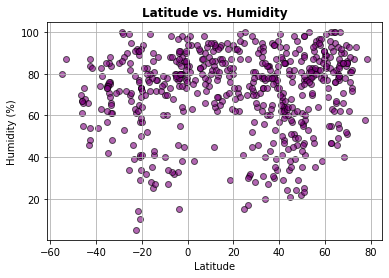

In [7]:
# Build scatter plot with data
plt_hum = city_data_df['Humidity']

plt.scatter(plt_lat, plt_hum, facecolor = "purple", edgecolor="black", linewidths=1, marker="o", alpha=0.6)

# Add labels
plt.title("Latitude vs. Humidity", fontweight = "bold")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("./images/latitude_vs_humidity", bbox_inches='tight')

plt.show()

####  Latitude vs. Cloudiness Plot

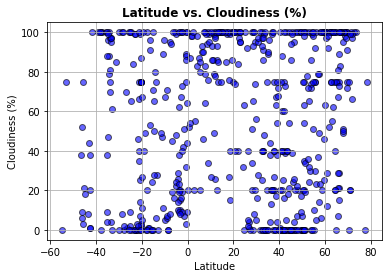

In [8]:
# Build scatter plot with data
plt_cloud = city_data_df['Cloudiness']

plt.scatter(plt_lat, plt_cloud, facecolor = "blue", edgecolor="black", linewidths=1, marker="o", alpha=0.6)

# Add labels
plt.title("Latitude vs. Cloudiness (%)", fontweight = "bold")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("./images/latitude_vs_cloudiness", bbox_inches='tight')

plt.show()

#### Latitude vs. Wind Speed Plot

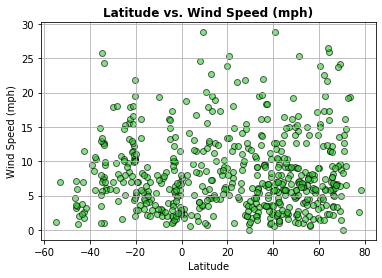

In [9]:
# Build scatter plot with data
plt_wind = city_data_df['Wind Speed']

plt.scatter(plt_lat, plt_wind, facecolor = "limegreen", edgecolor="black", linewidths=1, marker="o", alpha=0.6)

# Add labels
plt.title("Latitude vs. Wind Speed (mph)", fontweight = "bold")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("./images/latitude_vs_wind_speed", bbox_inches='tight')

plt.show()

### Linear Regression

In [10]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values, facecolor = "blue", edgecolor="black", linewidths=1, marker="o", alpha=0.6)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    
    print(f"The r-squared is: {rvalue}")

    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Latitude"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Latitude"] <0)]

#### Northern Hemisphere - Temperature (F) vs. Latitude

The r-squared is: -0.6935526089136201


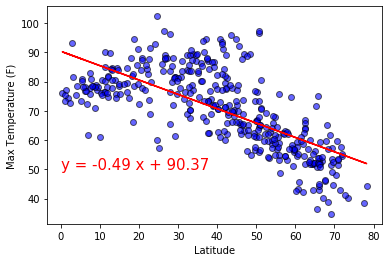

<Figure size 432x288 with 0 Axes>

In [12]:
# Define values
x_values = northern_hemi_df ["Latitude"]
y_values = northern_hemi_df ["Max Temperature"]

# Plot
plt.ylabel("Max Temperature (F)")

plot_linear_regression(x_values,y_values, (0,50))


plt.savefig("./images/n_temp_vs_latitude", bbox_inches='tight')
plt.show()

#### Southern Hemisphere - Temperature (F) vs. Latitude

The r-squared is: 0.8379473641520958


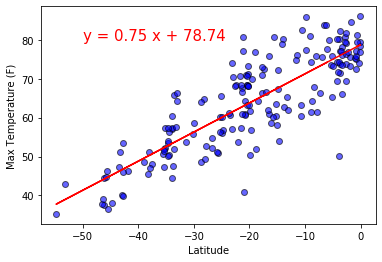

<Figure size 432x288 with 0 Axes>

In [13]:
# Define values
x_values = southern_hemi_df ["Latitude"]
y_values = southern_hemi_df ["Max Temperature"]

# Plot
plt.ylabel("Max Temperature (F)")

plot_linear_regression(x_values,y_values, (-50,80))

plt.savefig("./images/s_temp_vs_latitude", bbox_inches='tight')
plt.show()

#### Northern Hemisphere - Humidity (%) vs. Latitude

The r-squared is: -0.03945629768470765


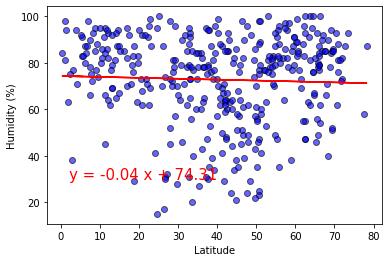

<Figure size 432x288 with 0 Axes>

In [14]:
# Define values
x_values = northern_hemi_df ["Latitude"]
y_values = northern_hemi_df ["Humidity"]

# Plot
plt.ylabel("Humidity (%)")
plot_linear_regression(x_values,y_values, (2,30))

plt.savefig("./images/n_humidity_vs_latitude", bbox_inches='tight')
plt.show()

#### Southern Hemisphere - Humidity (%) vs. Latitude

The r-squared is: 0.06265519600154545


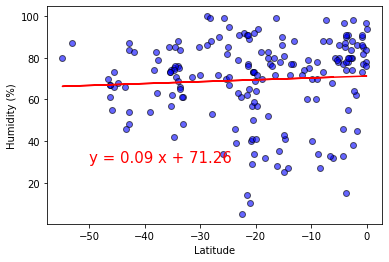

<Figure size 432x288 with 0 Axes>

In [15]:
# Define values
x_values = southern_hemi_df ["Latitude"]
y_values = southern_hemi_df ["Humidity"]

# Plot
plt.ylabel("Humidity (%)")
plot_linear_regression(x_values,y_values, (-50,30))

plt.savefig("./images/s_humidity_vs_latitude", bbox_inches='tight')
plt.show()

#### Northern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is: -0.10579475725150332


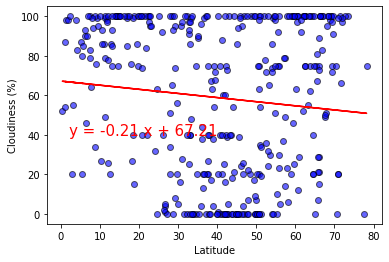

<Figure size 432x288 with 0 Axes>

In [16]:
# Define values
x_values = northern_hemi_df ["Latitude"]
y_values = northern_hemi_df ["Cloudiness"]

# Plot
plt.ylabel("Cloudiness (%)")
plot_linear_regression(x_values,y_values, (2,40))

plt.savefig("./images/n_cloudiness_vs_latitude", bbox_inches='tight')
plt.show()

#### Southern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is: -0.043867483207726654


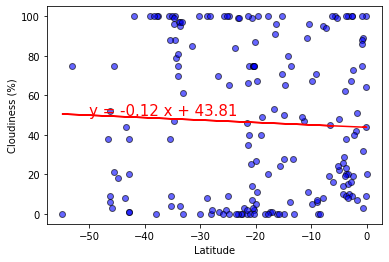

<Figure size 432x288 with 0 Axes>

In [17]:
# Define values
x_values = southern_hemi_df ["Latitude"]
y_values = southern_hemi_df ["Cloudiness"]

# Plot
plt.ylabel("Cloudiness (%)")
plot_linear_regression(x_values,y_values, (-50,50))

plt.savefig("./images/s_cloudiness_vs_latitude", bbox_inches='tight')
plt.show()

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is: -0.018794852447410988


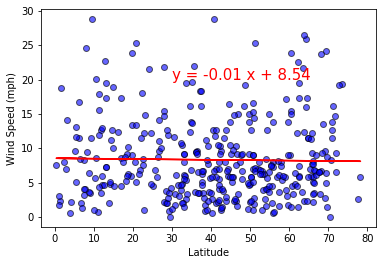

<Figure size 432x288 with 0 Axes>

In [18]:
# Define values
x_values = northern_hemi_df ["Latitude"]
y_values = northern_hemi_df ["Wind Speed"]

# Plot
plt.ylabel("Wind Speed (mph)")
plot_linear_regression(x_values,y_values, (30,20))

plt.savefig("./images/n_wind_vs_latitude", bbox_inches='tight')
plt.show()

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is: -0.09926377108952694


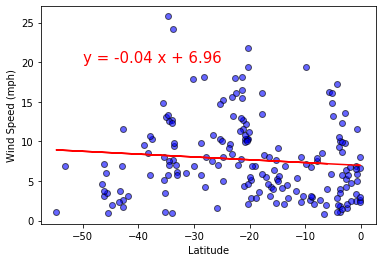

<Figure size 432x288 with 0 Axes>

In [19]:
# Define values
x_values = southern_hemi_df ["Latitude"]
y_values = southern_hemi_df ["Wind Speed"]

# Plot
plt.ylabel("Wind Speed (mph)")
plot_linear_regression(x_values,y_values, (-50,20))

plt.savefig("./images/s_wind_vs_latitude", bbox_inches='tight')
plt.show()